# Workshop Notebook

This jupyter notebook will make for the interactive part of this workshop

## Step 1: Inspect the data

Usually, the first thing we want to do when dealing with any new type of data, we want to inspect it first to get some intuitions for it. By visualizing the data, we can often get some ideas as to how to tackle the data and features we can extract from it.

In [2]:
import pandas as pd

label_file = 'data/labels.csv'
df = pd.read_csv(label_file)
df


,filename,train_type
0,signal_000.bin,train_a
1,signal_001.bin,train_a
2,signal_002.bin,train_a
3,signal_003.bin,train_a
4,signal_004.bin,train_a
5,signal_005.bin,train_a
6,signal_006.bin,train_a
7,signal_007.bin,train_a
8,signal_008.bin,train_a
9,signal_009.bin,train_a


What has been done here, is to load a csv file containing rows of filepaths and correspendong train types. The filepaths are stored as binary blobs which can be found in data/signals. The table shown above is an excerpt of this list as it has been read into a dataframe
Let us explore a couple of the signatures we can find there. I also encourage you to look at more of them to get an even better idea of the data


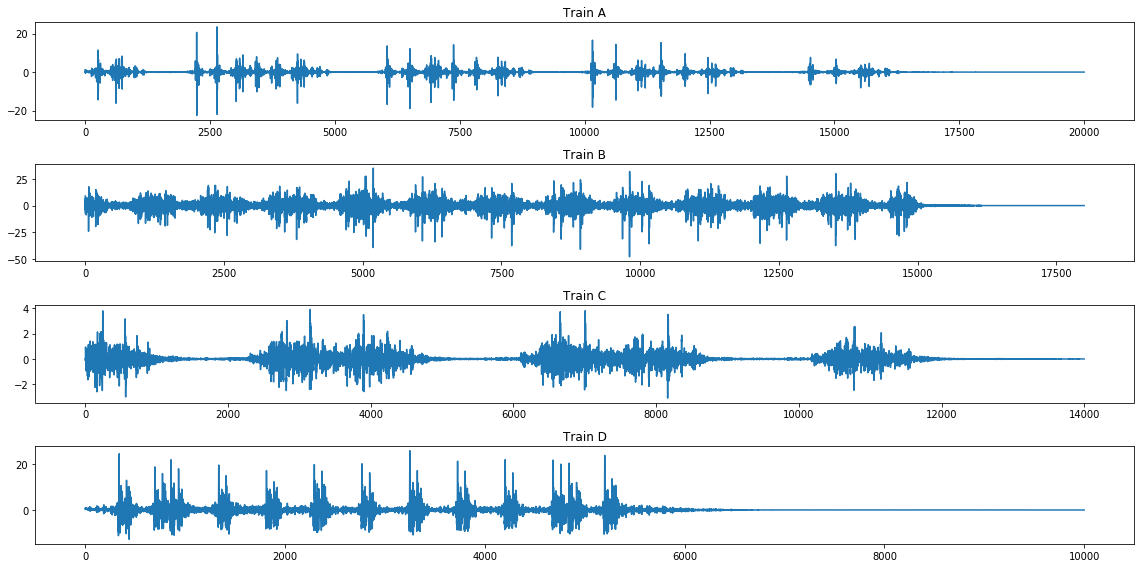

In [3]:
import matplotlib.pyplot as plt
from helpers import load_binary
from helpers import plot_size
%matplotlib inline

type_a = df.loc[df['train_type'] == 'train_a']
type_b = df.loc[df['train_type'] == 'train_b']
type_c = df.loc[df['train_type'] == 'train_c']
type_d = df.loc[df['train_type'] == 'train_d']

file_a = 'data/signals/' + type_a['filename'].iloc[0]
file_b = 'data/signals/' + type_b['filename'].iloc[0]
file_c = 'data/signals/' + type_c['filename'].iloc[0]
file_d = 'data/signals/' + type_d['filename'].iloc[0]

signal_a = load_binary(file_a)
signal_b = load_binary(file_b)
signal_c = load_binary(file_c)
signal_d = load_binary(file_d)

plot_size(16, 8)
plt.subplot(411)
plt.title('Train A')
plt.plot(signal_a)
plt.subplot(412)
plt.title('Train B')
plt.plot(signal_b)
plt.subplot(413)
plt.title('Train C')
plt.plot(signal_c)
plt.subplot(414)
plt.title('Train D')
plt.plot(signal_d)
plt.tight_layout()
plt.show()


Here we can already see a couple of things to expect from the data. The data comes in timeseries with thousands of timesteps and come with variable lengths. It's filled with impulses, likely from when wheels of the train is passing over the sensor. This means a couples of things already:
1. The data will not go well with a lot of Machine Learning methods as is, as there are too many timesteps in the signal
2. When trying to fit a model, we would want to consider some way of making the signals the same size

To get a better idea of the ranges of the data, we ought to compute some aggregate statistics as well

In [4]:
import numpy as np

# Allocate a bit of space for storing data
lengths = []
rms_values = []
value_max = []

# Iterate over all the signals and collect data from them
for filename in df['filename']:
    data = load_binary('data/signals/' + filename)
    rms = np.sqrt(np.mean(np.square(data)))  # Compute the Root Mean Square
    length = len(data)
    
    # Append values to lists
    lengths.append(length)
    rms_values.append(rms)
    value_max.append(max(np.abs(data)))

# Plot histograms and a bar plot of the gathered data to determine the spread of values
plot_size(16, 8)
plt.subplot(141)
plt.title('Signal Lengths')
plt.hist(lengths)
plt.subplot(142)
plt.title('Signal RMS')
plt.hist(rms_values)
plt.subplot(143)
plt.title('Signal Maximas')
plt.hist(value_max)
plt.subplot(144)
plt.title('Train Type Distribution')
df['train_type'].value_counts().plot(kind='bar')
plt.tight_layout()
plt.show()


From this, we can see that most of the signals are around 20000 timesteps long or shorter. We also see that there is quite a range of both maximum values of RMS values, but with stronger tendencies towards the lower end of the spectrum. We also see that we have a relatively even spread of train types, and also a category called "unknown". These are signals for which the train type is not known. The reason we look at this is to determine a number of things
1. See if there are strong tendencies in the data for which we can make simple filters
2. To help determine how data needs to be transformed for a potential model
3. Determine if special weighting or other techniques are required to deal with imbalanced datasets

Questions:
- What would you look at next with basis in this data?
- What is the simplest model you could use as a baseline for determining the train type here?


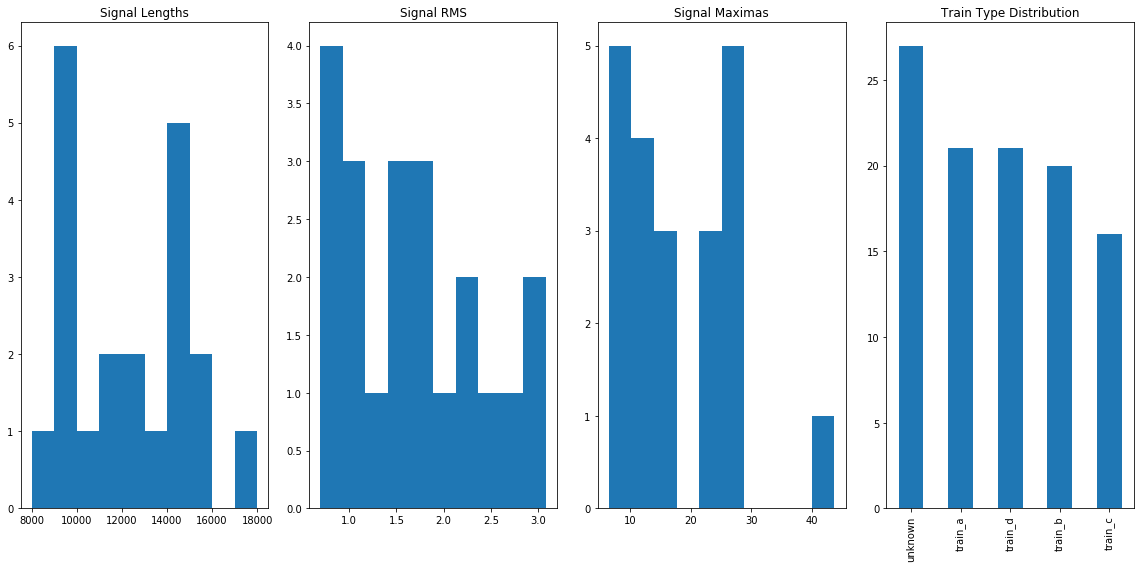

In [12]:

# Allocate a bit of space for storing data
lengths = []
rms_values = []
value_max = []

# Iterate over all the signals and collect data from them
for i in range(len(df)):
    filename = df['filename'][i]
    train_type = df['train_type'][i]
    if train_type != 'train_d':
        continue
    data = load_binary('data/signals/' + filename)
    rms = np.sqrt(np.mean(np.square(data)))  # Compute the Root Mean Square
    length = len(data)
    
    # Append values to lists
    lengths.append(length)
    rms_values.append(rms)
    value_max.append(max(np.abs(data)))

# Plot histograms and a bar plot of the gathered data to determine the spread of values
plot_size(16, 8)
plt.subplot(141)
plt.title('Signal Lengths')
plt.hist(lengths)
plt.subplot(142)
plt.title('Signal RMS')
plt.hist(rms_values)
plt.subplot(143)
plt.title('Signal Maximas')
plt.hist(value_max)
plt.subplot(144)
plt.title('Train Type Distribution')
df['train_type'].value_counts().plot(kind='bar')
plt.tight_layout()
plt.show()


## Step 2: 


In [ ]:

from keras.layers import Dense, Conv1D, MaxPool1D, Flatten
from keras.models import Sequential
from scipy.signal import periodogram

import numpy as np
import matplotlib.pyplot as plt
from helpers import load_binary
from keras.utils import to_categorical
from keras.regularizers import l2

%matplotlib inline

tt_lut = {'train_a': 0, 'train_b': 1, 'train_c': 2, 'train_d': 3, 'unknown': 4}
with open('data/labels.csv', 'r') as fp:
    labels = [line.replace('\n', '').split(',') for line in fp.readlines()[1:]]

np.random.seed(1337)
np.random.shuffle(labels)

x_train, y_train = [], []
for label in labels:
    filepath = 'data/signals/%s' % label[0]
    # label_id = 4 if label[1] == '' else int(label[1])
    label_id = tt_lut[label[1]]
    label_id = to_categorical(label_id, 5)
    data = load_binary(filepath)
    z = np.zeros(20000)
    z[:min(20000, len(data))] = data[:min(20000, len(data))]
    data = z
    _, data = periodogram(data, fs=2000)
    x_train.append(data)
    y_train.append(label_id)
x_train = np.array(x_train).reshape((len(x_train), -1, 1))
y_train = np.array(y_train)

r_eps = 1e-4
model = Sequential()
model.add(Conv1D(16, 5, padding='valid', input_shape=(x_train.shape[1], x_train.shape[2])))
model.add(MaxPool1D(2))
model.add(Conv1D(16, 5, kernel_regularizer=l2(r_eps)))
model.add(MaxPool1D(2))
model.add(Conv1D(16, 5, kernel_regularizer=l2(r_eps)))
model.add(Flatten())
model.add(Dense(5, activation='softmax'))
model.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['accuracy'])

logger = model.fit(x_train, y_train, epochs=200, batch_size=32, validation_split=0.25)
model.evaluate(x_train[-25:], y_train[-25:])

plt.plot(logger.history['accuracy'])
plt.plot(logger.history['val_accuracy'])
plt.tight_layout()
plt.show()

# data = np.array(x[1337]).reshape((1, 1))
# p = model.predict(data)

# print(p)

# plt.plot(x)
# plt.tight_layout()
# plt.show()


## Step 2: Do stuff
